In [2]:
import torch
x_train = torch.FloatTensor([[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]])
y_train = torch.FloatTensor([[1],[1],[1],[0],[0],[0],[0],[1],[0],[1],[1],[1]])


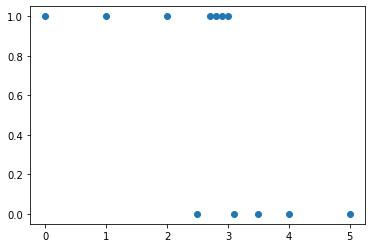

In [3]:
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train)
plt.show()

In [4]:
W = torch.zeros(1,1)
b = torch.zeros(1,1)
lr = 1.0

for epoch in range(3001):
  #W, b의 requires_grad를 True로 설정해서 backward가 가능하도록 설정
  W.requires_grad_(True)
  b.requires_grad_(True)
  
  #cost 설정
  hypothesis = torch.sigmoid(torch.mm(x_train, W) + b)
  cost = torch.mean(
    -y_train * torch.log(hypothesis)
    -(1 - y_train) * torch.log(1 - hypothesis)
  )

  #경사계산, W, b 업데이트
  cost.backward()
  with torch.no_grad() as grd:
    W = W - lr * W.grad
    b = b - lr * b.grad
  
  #epoch에 따른 cost W b 확인
  if epoch % 300 == 0:
      print( 'epoch: {}, cost: {:.6f}, W: {:.6f}, b: {:.6f}' .format(
                  epoch, cost.item(), W.squeeze(), b.squeeze()))

epoch: 0, cost: 0.693147, W: -0.154167, b: 0.083333
epoch: 300, cost: 0.390820, W: -2.174322, b: 6.609554
epoch: 600, cost: 0.383699, W: -2.620780, b: 7.953166
epoch: 900, cost: 0.382149, W: -2.832521, b: 8.587363
epoch: 1200, cost: 0.381706, W: -2.946402, b: 8.927781
epoch: 1500, cost: 0.381565, W: -3.010969, b: 9.120601
epoch: 1800, cost: 0.381517, W: -3.048561, b: 9.232802
epoch: 2100, cost: 0.381500, W: -3.070766, b: 9.299055
epoch: 2400, cost: 0.381494, W: -3.083992, b: 9.338511
epoch: 2700, cost: 0.381492, W: -3.091908, b: 9.362126
epoch: 3000, cost: 0.381491, W: -3.096662, b: 9.376306


In [5]:
#4.5에대한 0 or 1
x_test = torch.FloatTensor([[4.5]])
test_result = torch.sigmoid(torch.mm(x_test, W) + b)
print(torch.round(test_result))

tensor([[0.]])


In [6]:
#optim.SGD를 활용한 예시
W = torch.zeros(1,1)
b = torch.zeros(1,1)
lr = 1.0
optimizer = torch.optim.SGD([W,b], lr = 1.0)
for epoch in range(3001):
  W.requires_grad_(True)
  b.requires_grad_(True)
  hypothesis = torch.sigmoid(torch.mm(x_train, W) + b)
  cost = torch.mean(
    -y_train * torch.log(hypothesis)
    -(1 - y_train) * torch.log(1 - hypothesis)
  )

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()
  if epoch % 300 == 0:
      print( 'epoch: {}, cost: {:.6f}, W: {:.6f}, b: {:.6f}' .format(
                  epoch, cost.mean(), W.squeeze(), b.squeeze()))

epoch: 0, cost: 0.693147, W: -0.154167, b: 0.083333
epoch: 300, cost: 0.390820, W: -2.174322, b: 6.609554
epoch: 600, cost: 0.383699, W: -2.620780, b: 7.953166
epoch: 900, cost: 0.382149, W: -2.832521, b: 8.587363
epoch: 1200, cost: 0.381706, W: -2.946402, b: 8.927781
epoch: 1500, cost: 0.381565, W: -3.010969, b: 9.120601
epoch: 1800, cost: 0.381517, W: -3.048561, b: 9.232802
epoch: 2100, cost: 0.381500, W: -3.070766, b: 9.299055
epoch: 2400, cost: 0.381494, W: -3.083992, b: 9.338511
epoch: 2700, cost: 0.381492, W: -3.091908, b: 9.362126
epoch: 3000, cost: 0.381491, W: -3.096662, b: 9.376306


In [7]:
#optim.Adam을 활용한 예시
W = torch.zeros(1,1)
b = torch.zeros(1,1)
lr = 1.0
optimizer = torch.optim.Adam([W,b], lr=1.0)
for epoch in range(3001):
  W.requires_grad_(True)
  b.requires_grad_(True)
  hypothesis = torch.sigmoid(torch.mm(x_train, W) + b)
  cost = torch.mean(
    -y_train * torch.log(hypothesis)
    -(1 - y_train) * torch.log(1 - hypothesis)
  )

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()
  if epoch % 300 == 0:
      print( 'epoch: {}, cost: {:.6f}, W: {:.6f}, b: {:.6f}' .format(
                  epoch, cost.item(), W.squeeze(), b.squeeze()))

epoch: 0, cost: 0.693147, W: -1.000000, b: 1.000000
epoch: 300, cost: 0.381491, W: -3.103857, b: 9.397766
epoch: 600, cost: 0.381491, W: -3.103853, b: 9.397752
epoch: 900, cost: 0.381491, W: -3.103853, b: 9.397753
epoch: 1200, cost: 0.381491, W: -3.103851, b: 9.397753
epoch: 1500, cost: 0.381491, W: -3.103793, b: 9.397831
epoch: 1800, cost: 0.382265, W: -3.113703, b: 9.500632
epoch: 2100, cost: 0.381569, W: -3.092919, b: 9.408957
epoch: 2400, cost: 0.381532, W: -3.111349, b: 9.390011
epoch: 2700, cost: 0.381623, W: -3.091640, b: 9.407511
epoch: 3000, cost: 0.381521, W: -3.115572, b: 9.492721


In [8]:
#optim.Adadelta를 활용한 예시
W = torch.zeros(1,1)
b = torch.zeros(1,1)
lr = 1.0
optimizer = torch.optim.Adadelta([W,b])
for epoch in range(3001):
  W.requires_grad_(True)
  b.requires_grad_(True)
  hypothesis = torch.sigmoid(torch.mm(x_train, W) + b)
  cost = torch.mean(
    -y_train * torch.log(hypothesis)
    -(1 - y_train) * torch.log(1 - hypothesis)
  )

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()
  if epoch % 300 == 0:
      print( 'epoch: {}, cost: {:.6f}, W: {:.6f}, b: {:.6f}' .format(
                  epoch, cost.item(), W.squeeze(), b.squeeze()))

epoch: 0, cost: 0.693147, W: -0.003162, b: 0.003160
epoch: 300, cost: 0.537192, W: -0.537830, b: 1.522116
epoch: 600, cost: 0.458038, W: -1.015019, b: 3.038626
epoch: 900, cost: 0.417649, W: -1.490835, b: 4.520366
epoch: 1200, cost: 0.396584, W: -1.962221, b: 5.964029
epoch: 1500, cost: 0.386648, W: -2.389365, b: 7.257202
epoch: 1800, cost: 0.382993, W: -2.701013, b: 8.193676
epoch: 2100, cost: 0.381953, W: -2.875364, b: 8.715486
epoch: 2400, cost: 0.381644, W: -2.970553, b: 8.999921
epoch: 2700, cost: 0.381544, W: -3.024969, b: 9.162389
epoch: 3000, cost: 0.381510, W: -3.056807, b: 9.257408


In [9]:
# 여러가지 optimizer
optimizer = torch.optim.SGD([W,b], lr=1.0)
optimizer = torch.optim.Adam([W,b], lr=1.0)
optimizer = torch.optim.Adadelta([W,b])
optimizer = torch.optim.Adagrad([W,b])
optimizer = torch.optim.RMSprop([W,b])

In [17]:
#matplot을 활용한 시각화

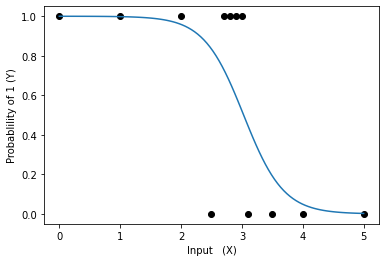

In [16]:
import matplotlib.pyplot as plt
W.requires_grad_(False)
b.requires_grad_(False)

plt.scatter(x_train, y_train, c='black')

X = torch.linspace(0,5,100).unsqueeze(1)
Y = torch.sigmoid(torch.mm(X,W)+b)
plt.ylabel("Probablility of 1 (Y)")
plt.xlabel("Input   (X)")
plt.plot(X, Y, label = 'Fitting line')
plt.show()